<a href="https://colab.research.google.com/github/islam-mirajul/Spinach-Recognition-Using-Convolutional-neural-networks/blob/main/Spinach_Recognition(VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("TF Version:", tf.__version__)
import tensorflow_hub as hub
print("TF hub Version:", hub.__version__)
print("GPU", "availabe" if tf.config.list_physical_devices("GPU") else "not availabe")

TF Version: 2.2.0
TF hub Version: 0.8.0
GPU availabe


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4446999909473653425, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4752533092533437147
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10223229733571267084
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4904806044747792184
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
import os
import numpy as np
np.random.seed(777)

import keras
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD, RMSprop

from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.applications.vgg16 import VGG16

from keras.regularizers import l2

from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

Using TensorFlow backend.


In [ ]:
output_classes = 5
batch_size = 64
img_height, img_width = 224,224
input_shape = (img_height, img_width, 3)
epochs = 5
nb_train_samples =2000
nb_test_samples =500

In [ ]:
train_dir = '/content/drive/My Drive/Spinach Classification/Train set'
test_dir = '/content/drive/My Drive/Spinach Classification/Test set'

In [ ]:
for root,dirs,files in os.walk(train_dir):
    print (root, len(files))


print("*"*30)
for root,dirs,files in os.walk(test_dir):
    print (root, len(files))

/content/drive/My Drive/Spinach Classification/Train set 0
/content/drive/My Drive/Spinach Classification/Train set/Water Spinach 595
/content/drive/My Drive/Spinach Classification/Train set/Malabar Spinach 606
/content/drive/My Drive/Spinach Classification/Train set/Jute Spinach 600
/content/drive/My Drive/Spinach Classification/Train set/Taro Spinach 618
/content/drive/My Drive/Spinach Classification/Train set/Red Spinach 609
******************************
/content/drive/My Drive/Spinach Classification/Test set 0
/content/drive/My Drive/Spinach Classification/Test set/Malabar Spinach 152
/content/drive/My Drive/Spinach Classification/Test set/Red Spinach 152
/content/drive/My Drive/Spinach Classification/Test set/Water Spinach 149
/content/drive/My Drive/Spinach Classification/Test set/Jute Spinach 150
/content/drive/My Drive/Spinach Classification/Test set/Taro Spinach 154


In [ ]:
random_seed = np.random.seed(1142)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 3028 images belonging to 5 classes.
Found 757 images belonging to 5 classes.


In [ ]:
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)
sgd_opt = SGD(lr=1e-06, momentum=0.0, decay=0.0, nesterov=False)
rmsp_opt = RMSprop(lr=1e-4, decay=0.9)

In [ ]:
from keras.models import Sequential
model = Sequential()

model.add(VGG16(weights = "imagenet", include_top=False, pooling = 'avg'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=output_classes, activation='softmax'))

model.layers[0].trainable = True

58892288/58889256 [==============================] - 6s 0us/step


In [ ]:
model.compile(optimizer= adam_opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 14,717,253
Trainable params: 14,717,253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch = nb_train_samples // batch_size,
  epochs = epochs,
  validation_data = test_generator,
  validation_steps = nb_test_samples // batch_size)

Epoch 1/5
31/31 [==============================] - 2219s 72s/step - loss: 1.3221 - accuracy: 0.4688 - val_loss: 0.9243 - val_accuracy: 0.8326
Epoch 2/5
31/31 [==============================] - 1295s 42s/step - loss: 0.2436 - accuracy: 0.9227 - val_loss: 0.0326 - val_accuracy: 0.9954
Epoch 3/5
31/31 [==============================] - 328s 11s/step - loss: 0.0747 - accuracy: 0.9737 - val_loss: 0.0216 - val_accuracy: 0.9955
Epoch 4/5
31/31 [==============================] - 337s 11s/step - loss: 0.0301 - accuracy: 0.9897 - val_loss: 0.1167 - val_accuracy: 0.9908
Epoch 5/5
31/31 [==============================] - 290s 9s/step - loss: 0.0143 - accuracy: 0.9974 - val_loss: 0.0024 - val_accuracy: 0.9955


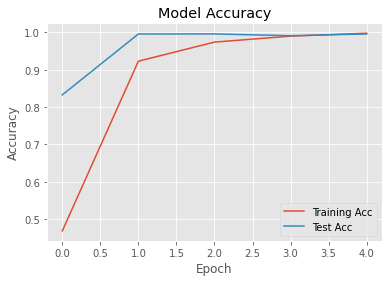

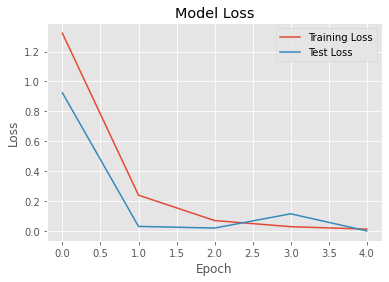

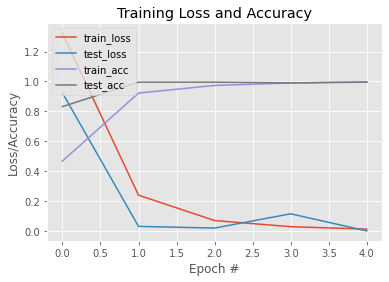

In [ ]:
plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Test Acc'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

plt.figure()
N = epochs
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="test_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [ ]:
score = model.evaluate_generator(test_generator, steps=5)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

Validation Score:  0.19969239830970764
Validation Accuracy:  0.987500011920929


In [ ]:
filename = test_generator.filenames
truth = test_generator.classes
label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

12/11 [==============================] - 110s 9s/step
No of errors = 4/757


Confusion Matrix
[[150   0   0   0   0]
 [  2 148   0   2   0]
 [  0   0 152   0   0]
 [  0   0   0 154   0]
 [  0   0   0   0 149]]


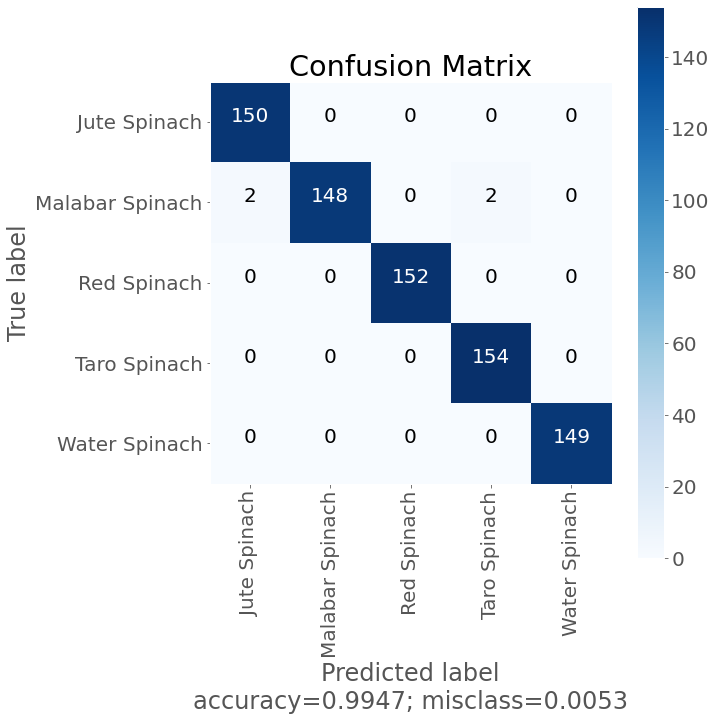

In [ ]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    ##plt.savefig('plots/12.DenseNet-DataSet-CM.png', bbox_inches='tight', dpi = 100) 
plt.figure(figsize=(10,10))


plot_confusion_matrix(cm, classes=labels,
                      title='Confusion Matrix')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred = predicts
y_pred_probabilities=y_pred

y_pred = np.argmax(y_pred,axis = 1) 
y_actual = test_generator.classes

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

confusion_mtx = confusion_matrix(y_actual, y_pred) 
print(confusion_mtx)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

[[150   0   0   0   0]
 [  2 148   0   2   0]
 [  0   0 152   0   0]
 [  0   0   0 154   0]
 [  0   0   0   0 149]]
                 precision    recall  f1-score   support

   Jute Spinach       0.99      1.00      0.99       150
Malabar Spinach       1.00      0.97      0.99       152
    Red Spinach       1.00      1.00      1.00       152
   Taro Spinach       0.99      1.00      0.99       154
  Water Spinach       1.00      1.00      1.00       149

       accuracy                           0.99       757
      macro avg       0.99      0.99      0.99       757
   weighted avg       0.99      0.99      0.99       757



In [ ]:
model.save('/content/drive/My Drive/Spinach model/VGG16-spinach-model.h5')
model.save_weights('/content/drive/My Drive/Spinach model/VGG16-spinach-Weights.h5')